## Titanic Problem

Exploring subset of dataset of passengers in RMS Titanic and selecting best features to predict their survival


## Importing initial libraries

In [4]:
import numpy as np
import pandas as pd
from IPython.display import display #allows use of displays
#importing suppplementary visualizations code
import visuals as vs
%matplotlib inline

## Importing Dataset

In [5]:
in_file = "titanic_data.csv"
full_data = pd.read_csv(in_file)

In [90]:
display(full_data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
#removing survival feature and storing it as another variable to later check the outcome of the algo 
outcome = full_data["Survived"]
data = full_data.drop("Survived",axis = 1)

In [9]:
data.loc[4]

PassengerId                           5
Pclass                                3
Name           Allen, Mr. William Henry
Sex                                male
Age                                  35
SibSp                                 0
Parch                                 0
Ticket                           373450
Fare                               8.05
Cabin                               NaN
Embarked                              S
Name: 4, dtype: object

## Creating Function to check accuracy of Predictions

In [10]:
#creates a func to check accuracy

def accuracy_score(truth, pred):
    """checks pred against truth"""
    
    #checks if both datasets are equal
    if len(truth) == len(pred):
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    else:
        return "Predictions don't match the number of outcomes"
    

In [11]:
predictions = pd.Series(np.ones(5,dtype = int))
print(accuracy_score(outcome[:5],predictions))

Predictions have an accuracy of 60.00%.


## Making Predictions

### First Case 

In [12]:
#Making predictions based on the fact we have no information on the person we are currently predicting

def prediction_0(data):
    """Chances of survival of a person we have no information on is zero
    since the current state of any random person suggets he'll die
    This is a model that says every person will die"""
    
    predictions = []
    
    for _,passengers in data.iterrows():
        predictions.append(0)
        
    return pd.Series(predictions)
    

In [13]:
predictions = prediction_0(data)

In [14]:
#finding accuracy of first one
print(accuracy_score(outcome,predictions))

Predictions have an accuracy of 61.62%.


### Second Case

##### Part 1

using sex as a feature to determine the predicitons

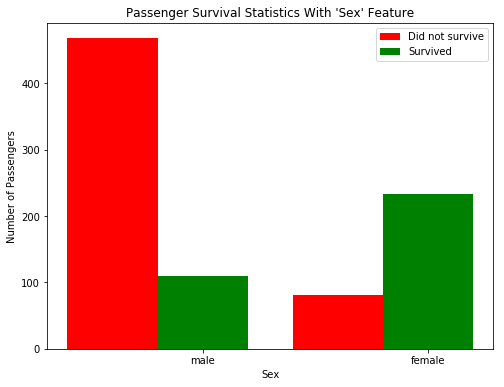

In [64]:
vs.survival_stats(data,outcome,"Sex")

In [65]:
#using sex as female to predict that a person survived
def prediction_1(data):
    
    predictions = []
    
    for _,passengers in data.iterrows():
        if(passengers["Sex"]=="female"):
            predictions.append(1)
        else:
            predictions.append(0)
            
    return pd.Series(predictions)
    

In [66]:
predictions = prediction_1(data)
#predictions

In [67]:
#finding accuracy of second one
print(accuracy_score(outcome,predictions))

Predictions have an accuracy of 78.68%.


##### Part 2

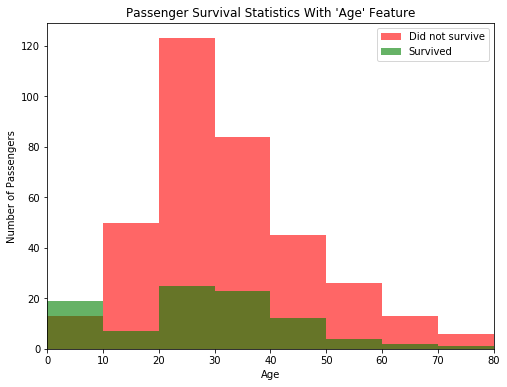

In [68]:
vs.survival_stats(data, outcome, 'Age', ["Sex == 'male'"])

In [69]:

def prediction_2(data):
    """If the person was
    Female then he/she survived
    Male and younger than 10 yrs then he/she survived
    otherwise did'nt survive"""
    
    predictions = []
    
    for _,passengers in data.iterrows():
        if((passengers["Sex"]=="female")or((passengers["Sex"]=="male")and(passengers["Age"]<10))):
            predictions.append(1)
        else:
            predictions.append(0)
            
    return pd.Series(predictions)
    

In [70]:
predictions = prediction_2(data)

In [71]:
print(accuracy_score(outcome,predictions))

Predictions have an accuracy of 79.35%.


### Third Case

Outcome for accuracy above 80%

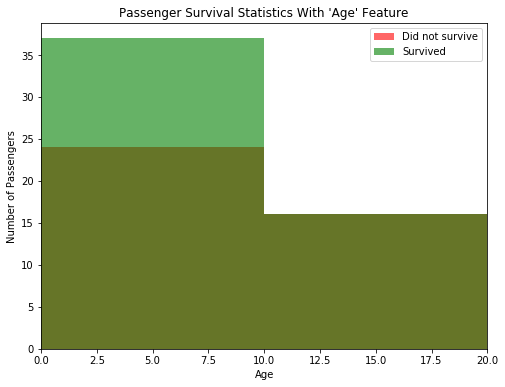

In [101]:
vs.survival_stats(data, outcome, 'Age', ["Fare > 10", "Age < 18"])

In [546]:
#permutations of cases to get prediction above 80%
def prediction_3(data):
    
    predictions = []
    
    for _,passengers in data.iterrows():
        if((passengers["Ticket"][0]) == "3" and passengers["Sex"] == "female" and passengers["Embarked"]=="S" ):
            predictions.append(0)
        elif(passengers["SibSp"] == 0 and passengers["Sex"] == "female") or (passengers["Sex"] == "female" and passengers["Embarked"] == "C") or (passengers["Sex"]=="female" and passengers["Fare"]>10) or (passengers["Age"]<5)   and (passengers["Embarked"]!="Q"):
            predictions.append(1) 
        else:
            predictions.append(0)
            
    return pd.Series(predictions )

In [547]:
predictions = prediction_3(data)

In [548]:
print(accuracy_score(outcome,predictions))

Predictions have an accuracy of 80.36%.
